## Bibliotecas

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from matplotlib import pyplot as plt
import numpy as np
import itertools

## Leitura do Dataset

In [21]:
dataset = pd.read_csv('/Users/jeanlima/Documents/GitHub/ElectricCurrentRecognition/CreatingDataset/ElectricCurrentDataset.txt')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Device
0,0.00,-0.18,-0.25,0.14,0.18,-0.14,0.07,-0.25,-0.04,-0.07,...,1.98,1.49,1.17,1.17,1.20,1.03,0.81,0.46,0.32,Notebook
1,0.07,-0.07,0.07,0.00,0.04,-0.07,0.14,-0.07,0.00,0.32,...,0.11,0.21,0.11,-0.04,-0.07,0.14,0.14,0.11,0.04,Notebook
2,0.07,0.04,-0.28,0.00,0.14,-0.25,-0.07,0.07,-0.04,0.11,...,0.00,0.14,-0.18,0.07,-0.28,0.11,-0.04,0.14,-0.11,Notebook
3,0.00,0.00,0.00,-0.18,0.60,1.42,2.23,1.84,1.66,1.24,...,-0.46,-0.25,-0.07,0.11,0.28,-0.07,0.00,0.32,-0.21,Notebook
4,1.59,1.42,1.20,1.35,1.31,1.10,0.60,0.18,0.00,-0.04,...,-0.07,-0.04,0.14,0.11,-0.07,0.14,0.18,-0.14,-0.11,Notebook


## Holdout 80/20

In [22]:
y = dataset['Device']
x = dataset.drop(['Device'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treino e Teste do Multilayer Perceptron

In [46]:
MLP = MLPClassifier(hidden_layer_sizes=(3,3,3),
                     max_iter=1000, 
                     activation='relu', 
                     learning_rate='constant',
                     learning_rate_init=0.001,
                     batch_size = 1)
MLP.fit(X_train, Y_train)

previsaoMLP = MLP.predict(X_test)

## Métricas de Desempenho

### Acurácia

In [47]:
print('Acurácia:', accuracy_score(Y_test, previsaoMLP))

Acurácia: 0.96875


### Matriz de Confusão

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

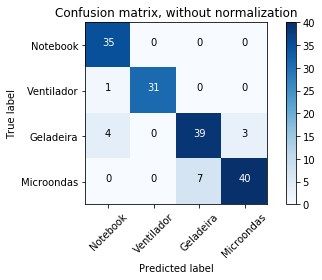

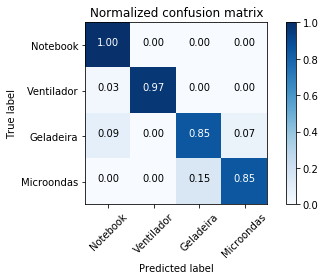

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, previsaoMLP)
np.set_printoptions(precision=2)

#Dataset class names
class_names = []
for i in dataset['Device']:
    if i not in class_names:
        class_names.append(i)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()